# Code Along - Visualization Using Matplotlib - IPL Data Analysis

In [1]:
# Path for the Dataset

path = "c:/users/kruti karia/desktop/ipl_data.csv"

In [17]:
# Import Packages / Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [18]:
# Read the Data

data = pd.read_csv(path)

In [19]:
# Data Attributes

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_code       136522 non-null  int64  
 1   date             136522 non-null  object 
 2   city             136522 non-null  object 
 3   venue            136522 non-null  object 
 4   team1            136522 non-null  object 
 5   team2            136522 non-null  object 
 6   toss_winner      136522 non-null  object 
 7   toss_decision    136522 non-null  object 
 8   winner           134704 non-null  object 
 9   win_type         134704 non-null  object 
 10  win_margin       134704 non-null  float64
 11  inning           136522 non-null  int64  
 12  delivery         136522 non-null  float64
 13  batting_team     136522 non-null  object 
 14  batsman          136522 non-null  object 
 15  non_striker      136522 non-null  object 
 16  bowler           136522 non-null  obje

,match_code,win_margin,inning,delivery,runs,extras,total
count,136522.000000,134704.000000,136522.000000,136522.000000,136522.000000,136522.000000,136522.000000
mean,590895.686534,17.389729,1.481769,9.510885,1.214881,0.069644,1.284526
std,195529.048724,21.764597,0.499669,5.672315,1.589211,0.353353,1.578578
min,335982.000000,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,419135.000000,6.000000,1.000000,4.500000,0.000000,0.000000,0.000000
50%,548348.000000,8.000000,1.000000,9.400000,1.000000,0.000000,1.000000
75%,733997.000000,22.000000,2.000000,14.300000,1.000000,0.000000,1.000000
max,981019.000000,144.000000,2.000000,19.900000,6.000000,7.000000,7.000000


In [20]:
# Check for null values

data.isnull().sum()

match_code              0
date                    0
city                    0
venue                   0
team1                   0
team2                   0
toss_winner             0
toss_decision           0
winner               1818
win_type             1818
win_margin           1818
inning                  0
delivery                0
batting_team            0
batsman                 0
non_striker             0
bowler                  0
runs                    0
extras                  0
total                   0
extras_type        129064
player_out         129807
wicket_kind        129807
wicket_fielders    131657
dtype: int64

In [28]:
# Create a year column which stores only the year of the dataset

data['year'] = data['date'].str[:4]


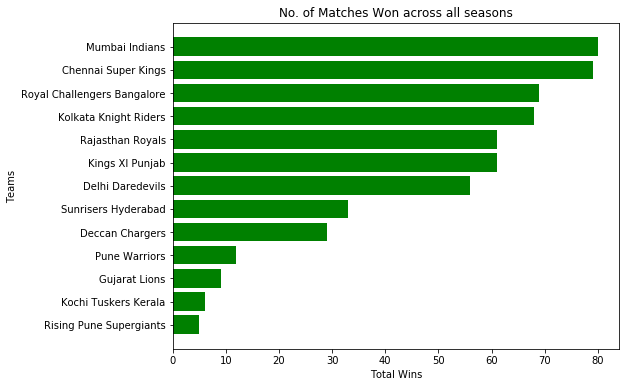

In [49]:
# Plot the wins gained by teams across all seasons

match_wise_data = data.drop_duplicates(subset='match_code')

total_wins = match_wise_data['winner'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,6))
plt.barh(total_wins.index,total_wins,color = 'green')
plt.xlabel('Total Wins')
plt.ylabel('Teams')
plt.title("No. of Matches Won across all seasons")
plt.show()


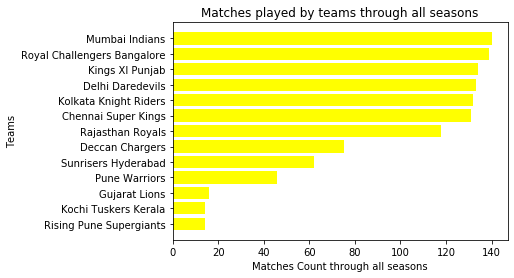

In [64]:
# Plot Number of matches played by each team through all seasons


temp_data = pd.melt(match_wise_data,id_vars=['match_code','year'],value_vars=['team1','team2'])

temp_data_values = temp_data['value'].value_counts().sort_values()

plt.barh(temp_data_values.index,temp_data_values,color = 'yellow')
plt.title("Matches played by teams through all seasons")
plt.xlabel("Matches Count through all seasons")
plt.ylabel("Teams")
plt.show()

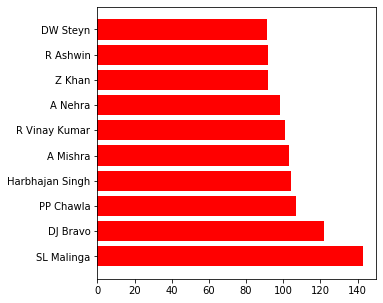

In [87]:
# Top bowlers through all seasons

wickets = data[(data['wicket_kind']=='bowled')|(data['wicket_kind']=='caught')|(data['wicket_kind']=='lbw')|(data['wicket_kind']=='caught and bowled')]


bowler_wickets = wickets.groupby(['bowler'])['wicket_kind'].count().sort_values(ascending=False)

plt.figure(figsize=(5,5))
plt.barh(bowler_wickets.index[:10],bowler_wickets[:10],color = 'red')
plt.show()

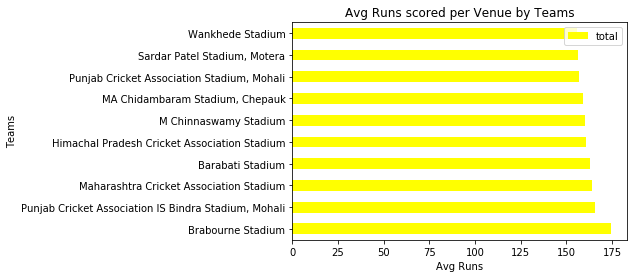

In [102]:
# How did the different pitches behave? What was the average score for each stadium?

score_per_venue = data.loc[:,['match_code','inning','venue','total']]
total_score = score_per_venue.groupby(['match_code','inning','venue'])[['total']].sum()
avg_score = total_score.groupby(['venue',])[['total']].mean().sort_values(by='total',ascending=False)
avg_score[:10].plot(kind = 'barh',color = 'yellow',title = "Avg Runs scored per Venue by Teams")
plt.xlabel("Avg Runs")
plt.ylabel("Teams")
plt.show()

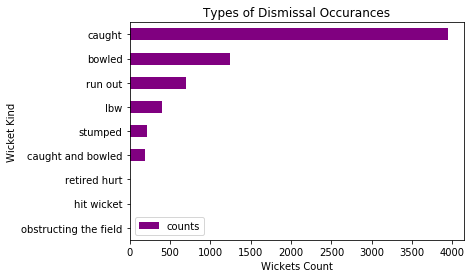

In [118]:
# Types of Dismissal and how often they occur

dismissed = data.groupby(['wicket_kind']).count().reset_index()
dismissed = dismissed[['wicket_kind','delivery']]
dismissed = dismissed.set_index('wicket_kind')
dismissed = dismissed.rename(columns={"delivery":"counts"})
dismissed = dismissed.sort_values(by='counts',ascending=True)

dismissed.plot(kind = 'barh',color = "purple")
plt.title("Types of Dismissal Occurances")
plt.xlabel("Wickets Count")
plt.ylabel("Wicket Kind")
plt.show()

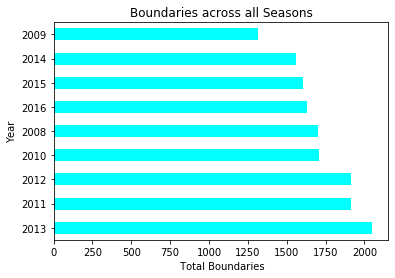

In [142]:
# Plot no. of boundaries across IPL seasons

boundaries_data = data.loc[:,['runs','year']]
boundaries_four = boundaries_data[boundaries_data['runs']==4]
fours = boundaries_four.groupby(['year'])['runs'].count().sort_values(ascending = False)

fours.plot(kind = 'barh',color = 'cyan')
plt.title("Boundaries across all Seasons")
plt.xlabel(" Total Boundaries")
plt.ylabel("Year")
plt.show()


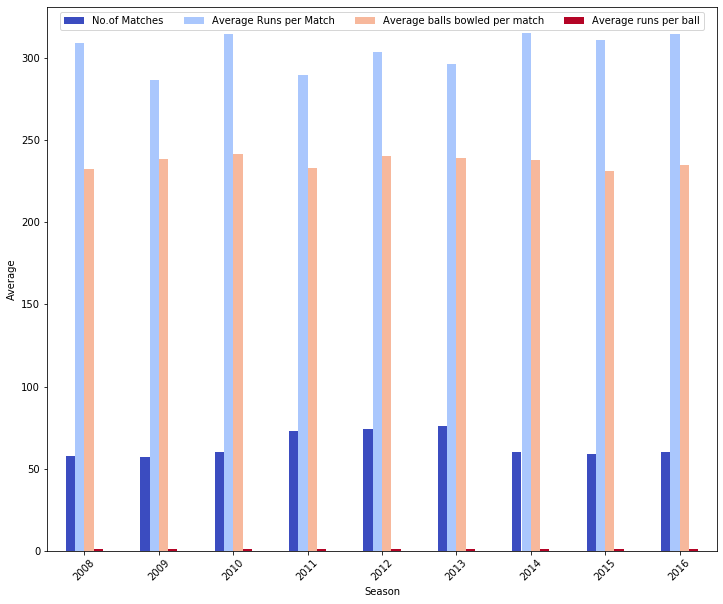

In [138]:
# Average statistics across all seasons
per_match_data = data.drop_duplicates(subset='match_code', keep='first').reset_index(drop=True)

total_runs_per_season = data.groupby('year')['total'].sum()

balls_delivered_per_season = data.groupby('year')['delivery'].count()

no_of_match_played_per_season = per_match_data.groupby('year')['match_code'].count()

avg_balls_per_match = balls_delivered_per_season/no_of_match_played_per_season

avg_runs_per_match = total_runs_per_season/no_of_match_played_per_season

avg_runs_per_ball = total_runs_per_season/balls_delivered_per_season

avg_data = pd.DataFrame([no_of_match_played_per_season, avg_runs_per_match, avg_balls_per_match, avg_runs_per_ball])

avg_data.index =['No.of Matches', 'Average Runs per Match', 'Average balls bowled per match', 'Average runs per ball']

avg_data.T.plot(kind='bar', figsize = (12,10), colormap = 'coolwarm')
plt.xlabel('Season')
plt.ylabel('Average')
plt.legend(loc=9,ncol=4)
plt.xticks(rotation = 45)
plt.show()
